# Project 3

## Problem 1

### Routine Demo

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from dtw import dtw, accelerated_dtw
import os
from typing import List
from sklearn.metrics import confusion_matrix

In [2]:
from mfcc import compute_mfcc
from dynamic_time_wrapping import dynamic_time_wrapping, euclidean_distance
from dynamic_time_wrapping_2 import dynamic_time_wrapping as dynamic_time_wrapping_2
from dynamic_time_wrapping_2 import dynamic_time_wrapping_fast as dynamic_time_wrapping_2_fast

In [3]:
def mfccs_from_file(file_path: str) -> np.ndarray:
    y, sr = librosa.load(file_path, sr=None)  # Load audio
    mfccs = compute_mfcc(y, sr, n_mfcc=13)        
    return mfccs

def mfccs_from_ndarray(signal: np.ndarray, sr: int=16000) -> np.ndarray:
    mfccs = compute_mfcc(signal, sr, n_mfcc=13)
    return mfccs

def dynamic_time_wrapping_example(mfccs1, mfccs2, *arg, **kwarg):
    return dtw(mfccs1.T, mfccs2.T, dist=lambda x, y: np.linalg.norm(x - y))

def dynamic_time_wrapping_example_fast(mfccs1, mfccs2, *arg, **kwarg):
    return accelerated_dtw(mfccs1.T, mfccs2.T, dist=lambda x, y: np.linalg.norm(x - y))

def dynamic_time_wrapping_mine(mfccs1: np.ndarray, mfccs2: np.ndarray):
    return dynamic_time_wrapping(mfccs1.T, mfccs2.T)

def dynamic_time_wrapping_mine_2(mfccs1: np.ndarray, mfccs2: np.ndarray):
    distance, cost_matrix, path = dynamic_time_wrapping_2(mfccs1.T, mfccs2.T)
    return distance, None, cost_matrix, path

def dynamic_time_wrapping_mine_2_fast(sequences: List[np.ndarray], sample: np.ndarray):
    shortest_distance, index_of_shortest, shortest_path = dynamic_time_wrapping_2_fast(sequences, sample)
    return shortest_distance, index_of_shortest, shortest_path

In [13]:
def visualize_dtw_results(distance, cost_matrix, accumulated_cost_matrix, path, sequence1, sequence2):
    print(f"DTW Distance: {distance}")
    print(f"Warping Path: {path}")

    # 1. Cost Matrix
    if not (cost_matrix is None):
        plt.figure(figsize=(5, 5))
        plt.imshow(cost_matrix, origin='lower', cmap='viridis')
        plt.title('Cost Matrix')
        plt.xlabel('Sequence 2')
        plt.ylabel('Sequence 1')
        plt.colorbar(label='Distance')
        # plt.xticks(np.arange(len(sequence2)), sequence2)
        # plt.yticks(np.arange(len(sequence1)), sequence1)
        plt.show()

    # 2. Accumulated Cost Matrix
    if not (accumulated_cost_matrix is None):
        plt.figure(figsize=(5, 5))
        plt.imshow(accumulated_cost_matrix, origin='lower', cmap='viridis')
        plt.title('Accumulated Cost Matrix')
        plt.xlabel('Sequence 2')
        plt.ylabel('Sequence 1')
        plt.colorbar(label='Accumulated Cost')
        # plt.xticks(np.arange(len(sequence2)), sequence2)
        # plt.yticks(np.arange(len(sequence1)), sequence1)
        plt.show()

    # 3. Warping Path
    if not (accumulated_cost_matrix is None):
        plt.figure(figsize=(5, 5))
        plt.imshow(accumulated_cost_matrix, origin='lower', cmap='viridis')
        plt.title('Warping Path')
        plt.xlabel('Sequence 2')
        plt.ylabel('Sequence 1')
        plt.colorbar(label='Accumulated Cost')
        plt.plot(path[1], path[0], 'r-', linewidth=2)  # Overlay the path
        # plt.xticks(np.arange(len(sequence2)), sequence2)
        # plt.yticks(np.arange(len(sequence1)), sequence1)
        plt.show()

    # 4. Sequences with Warping
    plt.figure(figsize=(8, 4))
    # Plot the first MFCC coefficient (or another relevant one) for visualization
    plt.plot(sequence1[:, 0], label='Sequence 1 (MFCC 0)', marker='o')  # Plotting the 0th coefficient
    plt.plot(sequence2[:, 0], label='Sequence 2 (MFCC 0)', marker='x')
    for i, j in zip(path[0], path[1]):
        plt.plot([j, i], [sequence2[j, 0], sequence1[i, 0]], 'k--', alpha=0.5)  # Connecting the 0th coefficient
    plt.title('Sequences with Warping')
    plt.xlabel('Time/Index')
    plt.ylabel('Value (MFCC Coefficient)') # Updated label
    plt.legend()
    plt.xticks([])
    plt.yticks([])
    plt.show()

DTW Distance: 1131.5985527038574
Warping Path: [[  0   0   1   1   2   4   5   5   6   8   8  10  11  12  12  14  16  17
   17  17  17  17  17  17  19  20  20  22  22  22  22  22  22  22  22  22
   22  22  22  22  23  25  27  29  29  29  30  32  34  36  38  40  42  44
   46  48  48  48  48  48  50  52  54  56  58  60  62  63  63  64  64  66
   68  69  69  71  72  73  75  76  77  77  77  78  80  81  82  84  86  86
   87  87  88  89  90  91  92  92  93  94  96  96  98  98  99 100 100 100
  100 101 102 104 104 106 106 108 108 108 109 110 112 114 116 117 117 119
  119 120 120 122 124 124 124 125 125 125 125 125 125 126 128 128 129 131
  133 135 136 137 138 139 140 142 144 146 148 150 152 154 155 157 159 161
  163 165 167 168 168 169 169 170 171 171 171 172 172 172 172 173 173 173
  173 173 173 173 174 176 176 176 176 176 176 176 176 176 176 176 176 176
  176 176 176 176 176 176 176 176 176 176 176 176 176 176 176 176 177 179
  180 182 182 182 182 183 185 187]
 [  0   1   2   3   4   5   6 

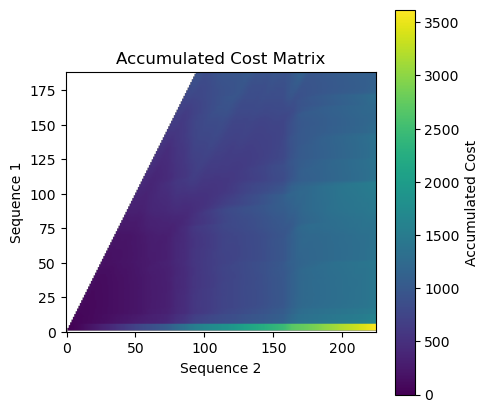

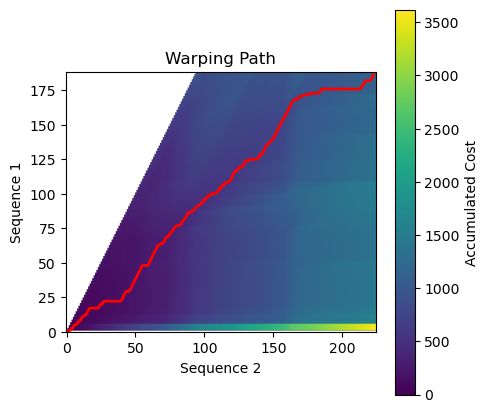

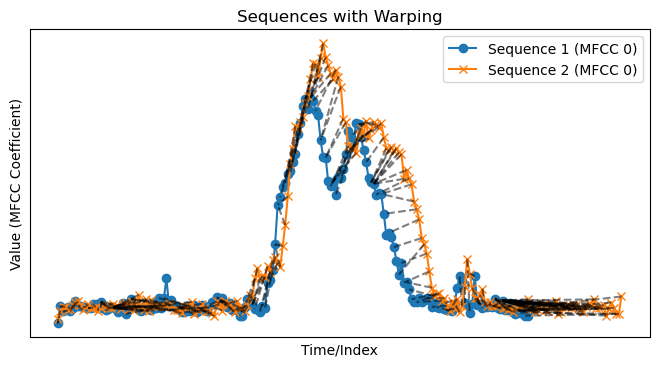

In [14]:
file1_path = "../../recordings/voices/digits/train/00.wav"  # Replace with your actual paths
file2_path = "../../recordings/voices/digits/test/02.wav"

file1_name = file1_path.split("/")[-1] #Extract filename
file2_name = file2_path.split("/")[-1]

mfccs1 = mfccs_from_file(file1_path)
mfccs2 = mfccs_from_file(file2_path)

# print(mfccs1.shape)
# print(mfccs2.shape)

# dtw_distance, cost_matrix, accumulated_cost_matrix, path = dynamic_time_wrapping_mine(mfccs1, mfccs2)
dtw_distance, cost_matrix, accumulated_cost_matrix, path = dynamic_time_wrapping_mine_2(mfccs1, mfccs2)
visualize_dtw_results(dtw_distance, cost_matrix, accumulated_cost_matrix, path, mfccs1.T, mfccs2.T)

### Naive DTW

In [18]:
def load_digit_data(data_dir, number_to_load: int = 5):
    data = []
    labels = []
    label_cnt = {}

    for filename in sorted(os.listdir(data_dir)): # sorted to ensure consistent order
        if filename.endswith(".wav"):
            filepath = os.path.join(data_dir, filename)
            try:
                label = filename[0] # Extract the first digit as the label
                if label in label_cnt:
                    label_cnt[label] += 1
                else:
                    label_cnt[label] = 1
                if label_cnt[label] > number_to_load:
                    continue
                y, sr = librosa.load(filepath, sr=None) # sr=None to preserve original sample rate
                data.append(y)  # Extend the list, more memory efficient than appending arrays repeatedly.
                labels.append(label)
                # print(y, label)

            except Exception as e:
                print(f"Error loading file {filename}: {e}")
                continue # Skip to the next file if there's an error

    return data, labels

In [7]:
# data_directory = "../../recordings/voices/digits/train"  # Replace with your actual path
# audio_data, labels = load_digit_data(data_directory)

# print(f"Loaded {len(labels)} samples.")
# print(f"Audio data shape: {len(audio_data)}")
# print(audio_data[0].shape)
# print(f"Labels: {labels}")


In [8]:
def plot_confusion_matrix(truth, prediction, classes):
    # Create a confusion matrix
    cm = confusion_matrix(truth, prediction)

    # Plot the confusion matrix as a heatmap
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    # Plot the confusion matrix as a stacked bar chart
    plt.bar(classes, cm[:, 0], label='True Negative')
    plt.bar(classes, cm[:, 1], bottom=cm[:, 0], label='False Positive')
    plt.bar(classes, cm[:, 2], bottom=cm[:, 0] + cm[:, 1], label='False Negative')
    plt.bar(classes, cm[:, 3], bottom=cm[:, 0] + cm[:, 1] + cm[:, 2], label='True Positive')
    plt.legend()
    plt.title('Confusion matrix')
    plt.xlabel('Category')
    plt.ylabel('Number of predictions')
    plt.show()

In [9]:
train_directory = "../../recordings/voices/digits/train"
train_data, train_labels = load_digit_data(train_directory)
test_directory = "../../recordings/voices/digits/test"
test_data, test_labels = load_digit_data(test_directory)

In [10]:
prediction = []
truth = []
for test_datum, test_label in zip(test_data, test_labels):
    dtw_distance_min = 0x3f3f3f3f
    results = None
    for train_datum, train_label in zip(train_data, train_labels):
        mfccs1 = mfccs_from_ndarray(train_datum)
        mfccs2 = mfccs_from_ndarray(test_datum)
        # print(mfccs1.shape)
        # print(mfccs2.shape)
        # dtw_distance, cost_matrix, accumulated_cost_matrix, path = dynamic_time_wrapping_mine(mfccs1, mfccs2)
        dtw_distance, cost_matrix, accumulated_cost_matrix, path = dynamic_time_wrapping_mine_2(mfccs1, mfccs2)
        # dtw_distance, cost_matrix, accumulated_cost_matrix, path = dynamic_time_wrapping_example_fast(mfccs1, mfccs2)
        # dtw_distance, cost_matrix, accumulated_cost_matrix, path = dynamic_time_wrapping_example(mfccs1, mfccs2)
        # print(f"Finish {train_label}")
        if dtw_distance < dtw_distance_min:
            dtw_distance_min = dtw_distance
            results = dtw_distance, cost_matrix, accumulated_cost_matrix, path, train_label
    if results:
        prediction.append(results[4])
        truth.append(test_label)
        print(f"Guessed label: {results[4]}")
        print(f"Correct label: {test_label}")
        print("--------------------")
    else:
        raise Exception

plot_confusion_matrix(truth, prediction, [str(i) for i in range(10)])


### Time Synchronized DTW

--------------------
Guessed label: 0
Correct label: 0
--------------------
--------------------
Guessed label: 0
Correct label: 0
--------------------
--------------------
Guessed label: 0
Correct label: 0
--------------------
--------------------
Guessed label: 0
Correct label: 0
--------------------
--------------------
Guessed label: 0
Correct label: 0
--------------------
--------------------
Guessed label: 1
Correct label: 1
--------------------
--------------------
Guessed label: 1
Correct label: 1
--------------------
--------------------
Guessed label: 1
Correct label: 1
--------------------
--------------------
Guessed label: 1
Correct label: 1
--------------------
--------------------
Guessed label: 1
Correct label: 1
--------------------
--------------------
Guessed label: 2
Correct label: 2
--------------------
--------------------
Guessed label: 2
Correct label: 2
--------------------
--------------------
Guessed label: 2
Correct label: 2
--------------------
------------

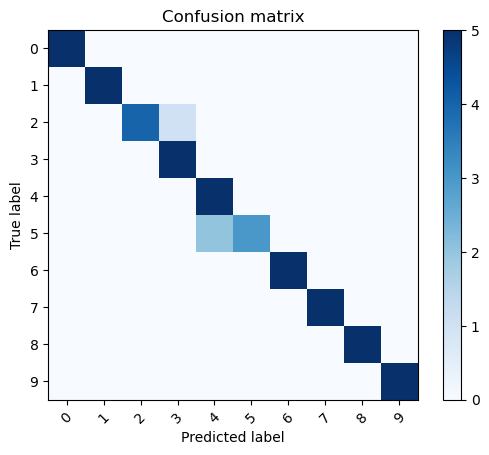

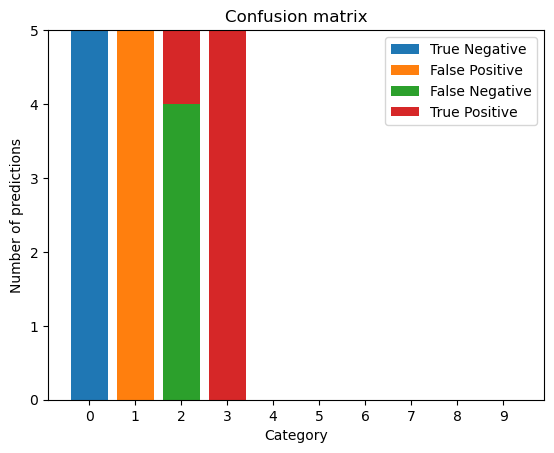

In [24]:
from dynamic_time_wrapping_2 import DynamicTimeWarping

train_data, train_labels = load_digit_data(train_directory, number_to_load=3)

prediction = []
truth = []
hit = 0

for test_datum, test_label in zip(test_data, test_labels):
    dtw_mine = DynamicTimeWarping(train_data, test_datum, pruning=False)
    index, min_distance = dtw_mine.search()
    if train_labels[index] == test_label:
        hit += 1
    print("--------------------")
    print(f"Guessed label: {train_labels[index]}")
    print(f"Correct label: {test_label}")
    print("--------------------")
    prediction.append(train_labels[index])
    truth.append(test_label)

    # plt.figure(figsize=(5, 5))
    # plt.imshow(dtw_mine._cost_matrix, origin='lower', cmap='viridis')
    # plt.title('Accumulated Cost Matrix')
    # plt.xlabel('Sequence 2')
    # plt.ylabel('Sequence 1')
    # plt.colorbar(label='Accumulated Cost')
    # plt.show()

print(f"Accuracy: {hit/len(test_labels) * 100}%")

plot_confusion_matrix(truth, prediction, [str(i) for i in range(10)])


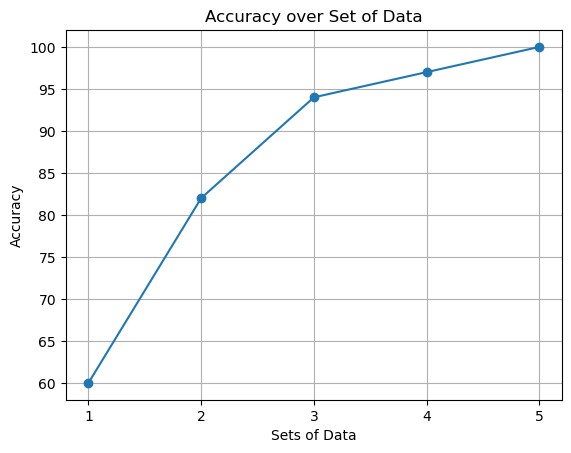

In [25]:
import matplotlib.pyplot as plt

accuracy = [60, 82, 94, 97, 100]
epochs = [1, 2, 3, 4, 5]

plt.plot(epochs, accuracy, marker='o', linestyle='-')  # 'o' for markers, '-' for line
plt.xlabel('Sets of Data')
plt.ylabel('Accuracy')
plt.title('Accuracy over Set of Data')
plt.xticks(epochs)  # Ensure all epoch values are shown on the x-axis
plt.grid(True)  # Add a grid for better readability (optional)
plt.show()

### Demo


In [ ]:
from segmentation import Segmentation

import librosa

from dynamic_time_wrapping_2 import DynamicTimeWarping

train_directory = "../../recordings/voices/digits/train"
train_data, train_labels = load_digit_data(train_directory)

# Good Mic Setup
Segmentation.speech_high_threshold = 128
Segmentation.speech_low_threshold = 16
Segmentation.silence_duration_threshold = 0.2
seg = Segmentation.from_basic(
    sample_rate=16000
)
# Words
seg.main()

file_path = "../../segment_results/result.wav"
y, sr = librosa.load(file_path, sr=None)  # Load audio

dtw_mine = DynamicTimeWarping(train_data, y, pruning=False)
index, min_distance = dtw_mine.search()
print("--------------------")
print(index)
print(f"Guessed label: {train_labels[index]}")
print("--------------------")